The longer you hold your stocks, the bigger the returns 
====================

What is the relation between "holding time" and positive returns in the stock market?

I wanted to reproduce the [following plot](https://g.foolcdn.com/misc-assets/hold%20stocks%20longer%20graph.png) made by the Motley Fool analysts:

![Copyright: Motley Fool](motley-fool_positive-returns.jpg) 

This plot basically explains why Warren Buffett is so rich. Because he is _old_. Of course, he is also damn smart. But let's not downplay the fact that he only became billionaire when he was 55 years old. And he bought his first stock when he was 11 years old (!!). 

Also, as I am Brazilian, I wanted to see whether the same pattern seen in S&P500 holds for [Ibovespa](https://en.wikipedia.org/wiki/Índice_Bovespa). 

# Input

How many trials in the monte carlo run?

In [1]:
n=5000

# Download data

S&P500, Ibovespa

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
periodo='max'
dt='1d'

In [4]:
#import nmmn.finance as nf
import yfinance as yf
import pandas as pd
import tqdm

In [5]:
ibovFull=yf.download(tickers="^BVSP", period=periodo, interval=dt, progress=False)
snpFull=yf.download(tickers="^GSPC", period=periodo, interval=dt, progress=False)

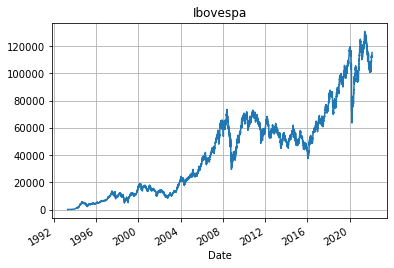

In [6]:
ibovFull['Close'].plot()
title("Ibovespa")
grid()

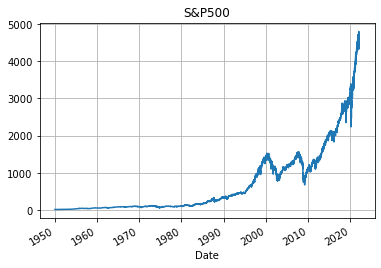

In [7]:
snpFull['Close'].plot()
title('S&P500')
grid()

In [8]:
ibov=ibovFull['Close']
snp=snpFull['Close']

# The functions that get the job done

In [9]:
def randReturn(ts,t=1, unit='y'):
    """
    Gets a random date in the TS, and computes the percentage return given the time units provided.
    """
    # gets a random date in the TS
    r=ts.sample()
    
    # gets start and end dates
    # lots of little tricks used here to get the dates right
    t0=r.index.date
    t0=t0[0].strftime('%Y-%m-%d')
    t1=r.index.date+pd.to_timedelta(t,unit=unit)
    i=ts.index.get_loc(t1[0].strftime('%Y-%m-%d'), method='nearest')
    t1=ts.index.date[i].strftime('%Y-%m-%d')
    
    return ts[t1]-ts[t0]

In [10]:
def positiveReturns(ts,t,unit):
    """
    Computes fraction of positive returns given the time parameters.
    """
    ret=[]

    for i in range(n):
        ret.append(randReturn(ts,t,unit))

    ret=array(ret)
    
    # what fraction of the returns are positive?
    return size(where(ret>0))/ret.size*100

In [11]:
def annotatePlot():
    annotate('1 day', xy=(0, 55), xycoords='data', fontsize=16, xytext=(+30, +60), textcoords='offset points', arrowprops=dict(facecolor='black', shrink=0.05), horizontalalignment='right', verticalalignment='bottom')
    annotate('1 month', xy=(1.5, 65), xycoords='data', fontsize=16, textcoords='offset points', arrowprops=dict(facecolor='black', shrink=0.05), horizontalalignment='right', verticalalignment='bottom')
    annotate('1 year', xy=(2.5, 65), xycoords='data', fontsize=16, xytext=(0, -60), textcoords='offset points', arrowprops=dict(facecolor='black', shrink=0.05), horizontalalignment='right', verticalalignment='bottom')
    annotate('5 years', xy=(3.3, 85), xycoords='data', fontsize=16, textcoords='offset points', arrowprops=dict(facecolor='black', shrink=0.05), horizontalalignment='right', verticalalignment='bottom')
    annotate('10 years', xy=(3.5, 85), xycoords='data', fontsize=16, xytext=(0, -80), textcoords='offset points', arrowprops=dict(facecolor='black', shrink=0.05), horizontalalignment='right', verticalalignment='bottom')
    annotate('20 years', xy=(3.9, 93), xycoords='data', fontsize=16, xytext=(+60, -60), textcoords='offset points', arrowprops=dict(facecolor='black', shrink=0.05), horizontalalignment='right', verticalalignment='bottom')

# Calculations

Periods covered correspond to, respectively:

- 1 day
- 1 month
- 1 year
- 5 years
- 10 years
- 20 years

In [12]:
t=[1,30,365,5*365,10*365,20*365]
units=['d','d','d','d','d','d']

## S&P500

In [13]:
snpReturns=[]

for i in tqdm.tqdm(range(size(t))):
    snpReturns.append(positiveReturns(snp,t[i],units[i]))
    
snpReturns=array(snpReturns)

100%|███████████████████████████████████████████| 6/6 [01:56<00:00, 19.41s/it]


## IBOV

In [14]:
ibovReturns=[]

for i in tqdm.tqdm(range(size(t))):
    ibovReturns.append(positiveReturns(ibov,t[i],units[i]))
    
ibovReturns=array(ibovReturns)

100%|███████████████████████████████████████████| 6/6 [01:02<00:00, 10.45s/it]


## Manually typed Motley Fool's data

Taken from the plot first displayed in this notebook.

In [15]:
MF=[52,60,69,78,87,95]

## Save data for later use

In [16]:
savez('data.npz', t=t,snp=snpReturns,ibov=ibovReturns,mf=MF) 

# Results

## Positive returns

/var/folders/pf/0v9z7cn1447c641hhf_d7n9w0000gn/T/ipykernel_13918/2811381768.py:3: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  annotate('1 month', xy=(1.5, 65), xycoords='data', fontsize=16, textcoords='offset points', arrowprops=dict(facecolor='black', shrink=0.05), horizontalalignment='right', verticalalignment='bottom')
/var/folders/pf/0v9z7cn1447c641hhf_d7n9w0000gn/T/ipykernel_13918/2811381768.py:5: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  annotate('5 years', xy=(3.3, 85), xycoords='data', fontsize=16, textcoords='offset points', arrowprops=dict(facecolor='black', shrink=0.05), horizontalalignment='right', verticalalignment='bottom')


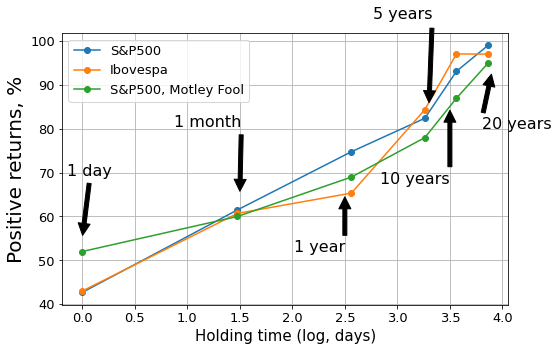

In [17]:
figure(figsize=(8,5))
plot(log10(t),snpReturns,'o-',label='S&P500')
plot(log10(t),ibovReturns,'o-',label='Ibovespa')
plot(log10(t),MF,'o-',label='S&P500, Motley Fool')

annotatePlot()
legend(fontsize=13)
tick_params(axis='both', which='major', labelsize=13)
tick_params(axis='both', which='minor', labelsize=12)
grid()
xlabel('Holding time (log, days)', fontsize=15)
ylabel('Positive returns, %', fontsize=20)

pylab.savefig('positive-returns.png', dpi=300)

I am glad I was able to broadly reproduce the results obtained by the MF analysis team. Notice however that my returns are systematically higher than MF's. Why?

## Systematic bias

Notice in the plot above that my results display a systematic bias: on the long term, they are 5% higher than what the MF team obtained. The reason is that the data I had access to covers a shorter timespan. My S&P500 data starts in 1950 whereas their data begins in 1928. Also, my Ibovespa data starts in 1993 whereas I know there is data elsewhere covering the period that starts in the 1960s. With a shorter timespan, my data included a smaller number of crashes, like the 1929 crash in S&P500.

# Conclusions

- The longer you hold your stocks, the more likely you will get positive returns. Patience is the key.
- Ibovespa positive returns follow closely those of S&P500, even with vastly different data coverage.